In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("sample_data/training1.csv")
df



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [ ]:
x = df.drop('Classes', axis=1)
y = df['Classes'].apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(16,16), activation="relu", max_iter=100, solver= "adam")

mlp_reg.fit(trainX_scaled, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(16, 16), max_iter=100)

In [ ]:
y_pred = mlp_reg.predict(testX_scaled)

In [ ]:
df_temp = pd.DataFrame({'Actual': Y_test, 'Predicted': np.floor(y_pred)})
df_temp.head(10)

,Actual,Predicted
184,1,1.0
46,1,0.0
134,0,0.0
124,0,0.0
6,1,0.0
51,0,-1.0
205,1,1.0
34,1,0.0
66,1,-1.0
198,1,1.0


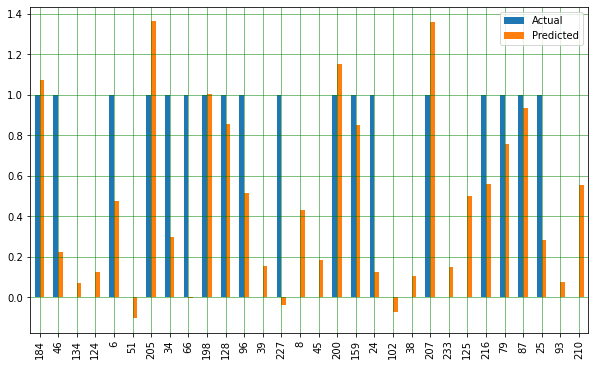

In [ ]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lin_clf_model = LogisticRegression()
lin_clf_model.fit(X_train, Y_train)


print('Average Training Error:', metrics.mean_absolute_error(Y_test, y_pred))
print("Accuracy: {:.2f}%".format(lin_clf_model.score(X_test, Y_test) * 100))

Average Training Error: 0.4221251166550979
Accuracy: 97.30%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
